In [692]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

stocksdf = pd.read_csv(r"Stock_Price_MAX.csv")


In [693]:
df = stocksdf

In [694]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [695]:
df.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4.392000e+03
mean,30.562539,30.893618,30.238833,30.572580,30.572580,1.884027e+06
std,29.914758,30.210974,29.615761,29.905778,29.905778,1.621609e+06
min,3.296875,3.390625,3.000000,3.250000,3.250000,1.904000e+05
25%,8.718125,8.803125,8.625000,8.712500,8.712500,1.088800e+06
50%,14.766250,14.981250,14.662500,14.767500,14.767500,1.539300e+06
75%,42.546248,43.051249,42.086249,42.539999,42.539999,2.188900e+06
max,121.080002,121.750000,120.169998,121.360001,121.360001,4.641260e+07


In [696]:
df = df.drop(['Date','Adj_Close'],axis = 1)

In [697]:
df.head(5)

,Open,High,Low,Close,Volume
0,3.812500,4.156250,3.812500,4.125000,3675600
1,4.125000,4.125000,4.000000,4.015625,1077600
2,4.000000,4.031250,3.953125,4.000000,437200
3,4.000000,4.000000,3.843750,3.843750,1883600
4,3.734375,3.734375,3.390625,3.390625,7931600


In [698]:
Df = df.to_csv('updated.csv')

In [8]:
Df = pd.read_csv('updated.csv')

In [9]:
Df=Df.drop(['Unnamed: 0'], axis = 1)

In [11]:
y = Df['Close'].tolist()

In [12]:
y = np.array(y)

In [13]:
y.shape

(4392,)

In [14]:
y

array([  4.125   ,   4.015625,   4.      , ..., 112.230003, 112.339996,
       113.190002])

In [15]:
del Df['Close']

In [16]:
Df.shape

(4392, 4)

In [17]:
Df[:5]

,Open,High,Low,Volume
0,3.812500,4.156250,3.812500,3675600
1,4.125000,4.125000,4.000000,1077600
2,4.000000,4.031250,3.953125,437200
3,4.000000,4.000000,3.843750,1883600
4,3.734375,3.734375,3.390625,7931600


In [18]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [19]:
from scipy.stats import zscore
Df['Open']= zscore(Df['Open'])
Df['Volume'] = zscore(Df['Volume'])
Df['High'] = zscore(Df['High'])
Df['Low'] = zscore(Df['Low'])

In [20]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 4 columns):
Open      4392 non-null float64
High      4392 non-null float64
Low       4392 non-null float64
Volume    4392 non-null float64
dtypes: float64(4)
memory usage: 137.3 KB


In [21]:
x = Df.as_matrix(columns=None)

In [23]:
x.shape

(4392, 4)

In [24]:
y.shape

(4392,)

In [25]:
x

array([[-0.89431058, -0.88512247, -0.89240801,  1.10493783],
       [-0.88386304, -0.88615698, -0.8860762 , -0.49735731],
       [-0.88804206, -0.88926051, -0.88765915, -0.89231874],
       ...,
       [ 2.7236301 ,  2.70119294,  2.70194906,  0.15583391],
       [ 2.73800591,  2.71476585,  2.76104594, -0.39004424],
       [ 2.73265691,  2.77733298,  2.76138371, -0.16795552]])

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [27]:
print(X_train.shape)
print(X_test.shape)


(3074, 4)
(1318, 4)


In [28]:
print(y_train.shape)
print(y_test.shape)

(3074,)
(1318,)


In [29]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=r"G:\215\network_best.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_regression= Sequential()
    model_regression.add(Dense(150,input_dim=X_train.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(100,activation='relu')) # Hidden 2
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(50,activation='relu'))
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(1))
    
    #model_regression.add(Dense(y_train.shape[2],activation='softmax')) # Output
    model_regression.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    
    model_regression.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

Using TensorFlow backend.


0
Train on 3074 samples, validate on 1318 samples
Epoch 1/1000
 - 1s - loss: 906.5053 - val_loss: 77.5468
Epoch 2/1000
 - 0s - loss: 47.3791 - val_loss: 11.4192
Epoch 3/1000
 - 1s - loss: 21.5368 - val_loss: 1.6890
Epoch 4/1000
 - 0s - loss: 18.7585 - val_loss: 1.1224
Epoch 5/1000
 - 0s - loss: 17.9746 - val_loss: 1.6922
Epoch 6/1000
 - 0s - loss: 16.2421 - val_loss: 1.1377
Epoch 7/1000
 - 0s - loss: 15.8791 - val_loss: 0.7579
Epoch 8/1000
 - 0s - loss: 15.1346 - val_loss: 0.3755
Epoch 9/1000
 - 1s - loss: 15.3064 - val_loss: 0.3843
Epoch 10/1000
 - 0s - loss: 14.1548 - val_loss: 1.1636
Epoch 11/1000
 - 0s - loss: 15.8102 - val_loss: 1.2888
Epoch 12/1000
 - 0s - loss: 14.4612 - val_loss: 2.7949
Epoch 13/1000
 - 0s - loss: 16.3884 - val_loss: 0.5618
Epoch 00013: early stopping
1
Train on 3074 samples, validate on 1318 samples
Epoch 1/1000
 - 1s - loss: 757.6232 - val_loss: 85.5084
Epoch 2/1000
 - 0s - loss: 51.7290 - val_loss: 15.7035
Epoch 3/1000
 - 0s - loss: 19.4238 - val_loss: 3.769

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [34]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model_regression.load_weights(r"G:\215\network_best.hdf5")

pred = model_regression.predict(X_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.2750389107898059


In [35]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.5244415227552124


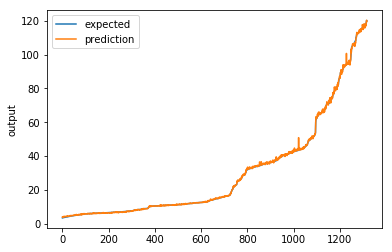

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
# Plot the chart
chart_regression(pred.flatten(),y_test)

regression model 2:

In [37]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=r"G:\215\network_best1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_regression= Sequential()
    model_regression.add(Dense(150,input_dim=X_train.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(100,activation='relu')) # Hidden 2
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(50,activation='relu'))
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(1))
    
    #model_regression.add(Dense(y_train.shape[2],activation='softmax')) # Output
    model_regression.compile(loss='mean_squared_error', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    
    model_regression.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 3074 samples, validate on 1318 samples
Epoch 1/1000
 - 2s - loss: 542.5270 - val_loss: 73.9681
Epoch 2/1000
 - 0s - loss: 36.9989 - val_loss: 20.8023
Epoch 3/1000
 - 0s - loss: 22.5710 - val_loss: 4.1842
Epoch 4/1000
 - 0s - loss: 18.2938 - val_loss: 4.3392
Epoch 5/1000
 - 0s - loss: 19.1219 - val_loss: 0.6178
Epoch 6/1000
 - 0s - loss: 18.0382 - val_loss: 0.3804
Epoch 7/1000
 - 0s - loss: 15.3097 - val_loss: 27.2881
Epoch 8/1000
 - 0s - loss: 17.0468 - val_loss: 1.4658
Epoch 9/1000
 - 0s - loss: 17.7063 - val_loss: 28.4276
Epoch 10/1000
 - 1s - loss: 16.5170 - val_loss: 0.9247
Epoch 11/1000
 - 0s - loss: 15.7117 - val_loss: 1.6654
Epoch 00011: early stopping
1
Train on 3074 samples, validate on 1318 samples
Epoch 1/1000
 - 2s - loss: 554.9243 - val_loss: 75.4472
Epoch 2/1000
 - 0s - loss: 39.4370 - val_loss: 8.8361
Epoch 3/1000
 - 0s - loss: 20.5940 - val_loss: 4.8036
Epoch 4/1000
 - 0s - loss: 18.8380 - val_loss: 4.7637
Epoch 5/1000
 - 0s - loss: 17.6289 - val_loss: 2.1750

In [38]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model_regression.load_weights(r"G:\215\network_best1.hdf5")

pred = model_regression.predict(X_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 0.3675435253554791
Final score (RMSE): 0.6062536806943766


In [40]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=r"G:\215\network_best2.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_regression= Sequential()
    model_regression.add(Dense(150,input_dim=X_train.shape[1], activation='tanh')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(100,activation='tanh')) # Hidden 2
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(50,activation='tanh'))
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(1))
    
    #model_regression.add(Dense(y_train.shape[2],activation='softmax')) # Output
    model_regression.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    
    model_regression.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 3074 samples, validate on 1318 samples
Epoch 1/1000
 - 2s - loss: 1402.7783 - val_loss: 1171.3341
Epoch 2/1000
 - 0s - loss: 1054.3987 - val_loss: 992.0418
Epoch 3/1000
 - 0s - loss: 900.9249 - val_loss: 854.0272
Epoch 4/1000
 - 0s - loss: 780.0408 - val_loss: 741.2020
Epoch 5/1000
 - 0s - loss: 672.9926 - val_loss: 645.2374
Epoch 6/1000
 - 0s - loss: 587.2379 - val_loss: 568.5444
Epoch 7/1000
 - 0s - loss: 519.5083 - val_loss: 502.5167
Epoch 8/1000
 - 0s - loss: 460.0988 - val_loss: 445.3285
Epoch 9/1000
 - 0s - loss: 407.8604 - val_loss: 398.6894
Epoch 10/1000
 - 0s - loss: 365.7998 - val_loss: 357.2599
Epoch 11/1000
 - 0s - loss: 327.8897 - val_loss: 319.0841
Epoch 12/1000
 - 0s - loss: 294.6554 - val_loss: 284.3711
Epoch 13/1000
 - 0s - loss: 263.5725 - val_loss: 253.6327
Epoch 14/1000
 - 0s - loss: 238.2795 - val_loss: 227.2414
Epoch 15/1000
 - 0s - loss: 214.2707 - val_loss: 204.1190
Epoch 16/1000
 - 0s - loss: 193.3602 - val_loss: 182.9158
Epoch 17/1000
 - 0s - loss: 

 - 0s - loss: 111.9718 - val_loss: 101.9181
Epoch 23/1000
 - 0s - loss: 104.6508 - val_loss: 92.1756
Epoch 24/1000
 - 1s - loss: 94.5820 - val_loss: 87.1923
Epoch 25/1000
 - 0s - loss: 86.2203 - val_loss: 74.1930
Epoch 26/1000
 - 0s - loss: 81.6292 - val_loss: 67.3568
Epoch 27/1000
 - 0s - loss: 73.1344 - val_loss: 60.1628
Epoch 28/1000
 - 0s - loss: 68.1938 - val_loss: 55.4090
Epoch 29/1000
 - 0s - loss: 63.1159 - val_loss: 50.9967
Epoch 30/1000
 - 0s - loss: 59.5191 - val_loss: 47.9517
Epoch 31/1000
 - 0s - loss: 56.4238 - val_loss: 39.6673
Epoch 32/1000
 - 0s - loss: 50.4328 - val_loss: 35.4824
Epoch 33/1000
 - 0s - loss: 51.4872 - val_loss: 32.1649
Epoch 34/1000
 - 0s - loss: 45.3014 - val_loss: 29.2263
Epoch 35/1000
 - 0s - loss: 41.0634 - val_loss: 26.3986
Epoch 36/1000
 - 0s - loss: 39.1668 - val_loss: 24.1687
Epoch 37/1000
 - 0s - loss: 38.1490 - val_loss: 23.6195
Epoch 38/1000
 - 0s - loss: 37.1747 - val_loss: 21.7016
Epoch 39/1000
 - 0s - loss: 35.4454 - val_loss: 19.4177
Epo

 - 0s - loss: 68.6296 - val_loss: 52.1934
Epoch 28/1000
 - 0s - loss: 63.3502 - val_loss: 47.5484
Epoch 29/1000
 - 0s - loss: 57.3420 - val_loss: 43.8926
Epoch 30/1000
 - 0s - loss: 54.3913 - val_loss: 42.0113
Epoch 31/1000
 - 0s - loss: 52.5040 - val_loss: 34.5382
Epoch 32/1000
 - 0s - loss: 45.5177 - val_loss: 31.8469
Epoch 33/1000
 - 0s - loss: 46.4566 - val_loss: 30.7856
Epoch 34/1000
 - 0s - loss: 39.9223 - val_loss: 25.6103
Epoch 35/1000
 - 0s - loss: 39.8273 - val_loss: 24.9585
Epoch 36/1000
 - 0s - loss: 35.9623 - val_loss: 21.0534
Epoch 37/1000
 - 0s - loss: 34.7538 - val_loss: 28.1779
Epoch 38/1000
 - 0s - loss: 35.1139 - val_loss: 19.9536
Epoch 39/1000
 - 0s - loss: 31.8268 - val_loss: 18.0889
Epoch 40/1000
 - 0s - loss: 30.6327 - val_loss: 14.9775
Epoch 41/1000
 - 0s - loss: 30.1213 - val_loss: 15.1056
Epoch 42/1000
 - 0s - loss: 29.8669 - val_loss: 12.1324
Epoch 43/1000
 - 0s - loss: 26.9130 - val_loss: 10.3893
Epoch 44/1000
 - 0s - loss: 29.0374 - val_loss: 9.9787
Epoch 4

In [42]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model_regression.load_weights(r"G:\215\network_best2.hdf5")

pred = model_regression.predict(X_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 2.5936110924904785
Final score (RMSE): 1.6104692150086193


In [43]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import optimizers

checkpointer = ModelCheckpoint(filepath=r"G:\215\network_best3.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_regression= Sequential()
    model_regression.add(Dense(150,input_dim=X_train.shape[1], activation='tanh')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(100,activation='tanh')) # Hidden 2
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(50,activation='tanh'))
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(1))
    
    #model_regression.add(Dense(y_train.shape[2],activation='softmax')) # Output
    model_regression.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    
    model_regression.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 3074 samples, validate on 1318 samples
Epoch 1/1000
 - 2s - loss: 1434.5256 - val_loss: 1207.7169
Epoch 2/1000
 - 0s - loss: 1084.0845 - val_loss: 1017.6890
Epoch 3/1000
 - 0s - loss: 923.5782 - val_loss: 875.4117
Epoch 4/1000
 - 0s - loss: 793.2146 - val_loss: 756.6898
Epoch 5/1000
 - 0s - loss: 688.6029 - val_loss: 660.2468
Epoch 6/1000
 - 0s - loss: 599.5834 - val_loss: 580.9188
Epoch 7/1000
 - 0s - loss: 531.8334 - val_loss: 514.9895
Epoch 8/1000
 - 0s - loss: 472.0007 - val_loss: 458.8725
Epoch 9/1000
 - 0s - loss: 421.5019 - val_loss: 409.3436
Epoch 10/1000
 - 0s - loss: 375.4133 - val_loss: 364.9216
Epoch 11/1000
 - 0s - loss: 336.3247 - val_loss: 327.8376
Epoch 12/1000
 - 0s - loss: 301.0956 - val_loss: 293.4767
Epoch 13/1000
 - 0s - loss: 271.9975 - val_loss: 262.8171
Epoch 14/1000
 - 0s - loss: 245.1025 - val_loss: 233.7812
Epoch 15/1000
 - 0s - loss: 219.7122 - val_loss: 209.3192
Epoch 16/1000
 - 0s - loss: 197.3641 - val_loss: 186.7977
Epoch 17/1000
 - 0s - loss:

Train on 3074 samples, validate on 1318 samples
Epoch 1/1000
 - 2s - loss: 1406.1977 - val_loss: 1173.8946
Epoch 2/1000
 - 0s - loss: 1053.6469 - val_loss: 993.2812
Epoch 3/1000
 - 0s - loss: 898.9799 - val_loss: 853.2612
Epoch 4/1000
 - 0s - loss: 773.5100 - val_loss: 737.7818
Epoch 5/1000
 - 0s - loss: 672.1815 - val_loss: 643.5362
Epoch 6/1000
 - 0s - loss: 587.1277 - val_loss: 566.8248
Epoch 7/1000
 - 0s - loss: 516.2942 - val_loss: 501.7348
Epoch 8/1000
 - 0s - loss: 460.6193 - val_loss: 446.8170
Epoch 9/1000
 - 0s - loss: 411.4632 - val_loss: 399.5390
Epoch 10/1000
 - 0s - loss: 366.7574 - val_loss: 357.2523
Epoch 11/1000
 - 0s - loss: 330.1837 - val_loss: 320.5156
Epoch 12/1000
 - 0s - loss: 298.4815 - val_loss: 286.2375
Epoch 13/1000
 - 0s - loss: 263.4612 - val_loss: 256.5369
Epoch 14/1000
 - 0s - loss: 236.5224 - val_loss: 228.8873
Epoch 15/1000
 - 0s - loss: 212.4301 - val_loss: 203.6194
Epoch 16/1000
 - 0s - loss: 192.1824 - val_loss: 181.4985
Epoch 17/1000
 - 0s - loss: 17

 - 0s - loss: 1063.5202 - val_loss: 998.0587
Epoch 3/1000
 - 0s - loss: 904.1239 - val_loss: 857.7635
Epoch 4/1000
 - 0s - loss: 778.5660 - val_loss: 742.1250
Epoch 5/1000
 - 0s - loss: 675.9237 - val_loss: 646.9269
Epoch 6/1000
 - 0s - loss: 590.4197 - val_loss: 570.0799
Epoch 7/1000
 - 0s - loss: 519.9579 - val_loss: 507.0754
Epoch 8/1000
 - 0s - loss: 467.5423 - val_loss: 452.4831
Epoch 9/1000
 - 0s - loss: 416.1043 - val_loss: 406.1570
Epoch 10/1000
 - 0s - loss: 372.3728 - val_loss: 363.7360
Epoch 11/1000
 - 0s - loss: 336.8432 - val_loss: 325.6795
Epoch 12/1000
 - 0s - loss: 302.7905 - val_loss: 291.3617
Epoch 13/1000
 - 0s - loss: 269.5934 - val_loss: 260.8713
Epoch 14/1000
 - 0s - loss: 243.3395 - val_loss: 233.1266
Epoch 15/1000
 - 0s - loss: 217.6031 - val_loss: 208.4505
Epoch 16/1000
 - 0s - loss: 199.0859 - val_loss: 186.2671
Epoch 17/1000
 - 0s - loss: 176.2844 - val_loss: 167.3471
Epoch 18/1000
 - 0s - loss: 158.7301 - val_loss: 149.7904
Epoch 19/1000
 - 0s - loss: 143.42

In [45]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model_regression.load_weights(r"G:\215\network_best3.hdf5")

pred = model_regression.predict(X_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 2.2273744394924653
Final score (RMSE): 1.4924390907144134


## LSTM

In [699]:
Df = pd.read_csv('updated.csv')

In [700]:
Df=Df.drop(['Unnamed: 0'], axis = 1)
Df['Close_y']= Df['Close']
Df.head()

,Open,High,Low,Close,Volume,Close_y
0,3.812500,4.156250,3.812500,4.125000,3675600,4.125000
1,4.125000,4.125000,4.000000,4.015625,1077600,4.015625
2,4.000000,4.031250,3.953125,4.000000,437200,4.000000
3,4.000000,4.000000,3.843750,3.843750,1883600,3.843750
4,3.734375,3.734375,3.390625,3.390625,7931600,3.390625


In [454]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [701]:
Df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Close_y'], dtype='object')

In [702]:
Df=Df[['Open', 'High', 'Low','Volume','Close','Close_y']]

In [703]:
import sklearn
import sklearn.preprocessing
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Volume'] = min_max_scaler.fit_transform(df.Volume.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    return df

In [704]:
Df=normalize_data(Df)

C:\Users\raval\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [705]:
Df.head()


,Open,High,Low,Volume,Close,Close_y
0,0.004378,0.006469,0.006934,0.075401,0.007408,4.125000
1,0.007031,0.006205,0.008535,0.019194,0.006482,4.015625
2,0.005970,0.005413,0.008135,0.005339,0.006350,4.000000
3,0.005970,0.005149,0.007201,0.036632,0.005027,3.843750
4,0.003714,0.002904,0.003334,0.167478,0.001191,3.390625


In [706]:
train=Df[:3074]
test=Df[3074:]
x_train=train[['Open', 'High', 'Low', 'Volume', 'Close']]
x_test=test[['Open', 'High', 'Low', 'Volume', 'Close']]
y_train=train['Close_y'].tolist()
y_test=test['Close_y'].tolist()
x_train=x_train.as_matrix()
x_test=x_test.as_matrix()



In [707]:
import numpy as np

def to_sequences(seq_size, data1,data2):
    x = []
    y = []

    for i in range(len(data1)-SEQUENCE_SIZE-1):
        #print(i)
        window = data1[i:(i+SEQUENCE_SIZE)]
        after_window = data2[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [708]:
SEQUENCE_SIZE = 7
x_train,y_train = to_sequences(SEQUENCE_SIZE,x_train,y_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,x_test,y_test)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (3066, 7, 1, 5)
Shape of x_test: (1310, 7, 1, 5)
Shape of y_train: (3066,)
Shape of y_test: (1310,)


In [709]:
x_train=x_train.reshape(3066,7,5)
x_test=x_test.reshape(1310,7,5)

# model

In [711]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"G:\215\lstm.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=10)  


Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 292s - loss: 162.9618 - val_loss: 9498.4994
Epoch 2/10
 - 5s - loss: 26.1587 - val_loss: 3527.5732
Epoch 3/10
 - 4s - loss: 17.3627 - val_loss: 1730.2013
Epoch 4/10
 - 4s - loss: 11.3442 - val_loss: 329.6103
Epoch 5/10
 - 4s - loss: 6.9778 - val_loss: 20.4097
Epoch 6/10
 - 4s - loss: 4.8154 - val_loss: 259.1655
Epoch 7/10
 - 4s - loss: 4.4174 - val_loss: 227.1077
Epoch 8/10
 - 4s - loss: 3.7452 - val_loss: 441.1601
Epoch 9/10
 - 4s - loss: 3.3543 - val_loss: 560.4616
Epoch 10/10
 - 4s - loss: 3.0891 - val_loss: 542.0368
Epoch 00010: early stopping
1
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 60s - loss: 175.6763 - val_loss: 8088.9447
Epoch 2/10
 - 4s - loss: 27.4309 - val_loss: 3227.0900
Epoch 3/10
 - 4s - loss: 17.5436 - val_loss: 670.3904
Epoch 4/10
 - 4s - loss: 10.8170 - val_loss: 124.4443
Epoch 5/10
 - 4s - loss: 8.4865 - val_loss: 17.2944
Epoch 6/10
 - 4s - loss: 5.

In [712]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"G:\215\lstm.hdf5")

pred = model.predict(x_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 17.294371614013365
Final score (RMSE): 4.15865021539602


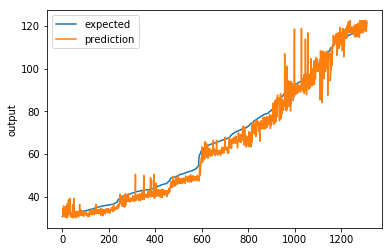

In [713]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
# Plot the chart
chart_regression(pred.flatten(),y_test)

In [678]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"G:\215\lstm1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation = 'relu'))
    model.add(Dropout(0.10))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.10))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=10)  

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 13s - loss: 190.7210 - val_loss: 6594.5243
Epoch 2/10
 - 2s - loss: 30.2974 - val_loss: 2718.5426
Epoch 3/10
 - 1s - loss: 22.0634 - val_loss: 1125.7350
Epoch 4/10
 - 1s - loss: 16.2243 - val_loss: 46.5027
Epoch 5/10
 - 1s - loss: 11.9850 - val_loss: 96.5365
Epoch 6/10
 - 1s - loss: 9.9354 - val_loss: 179.8258
Epoch 7/10
 - 1s - loss: 8.9891 - val_loss: 242.6054
Epoch 8/10
 - 1s - loss: 7.8102 - val_loss: 186.1185
Epoch 9/10
 - 1s - loss: 7.2466 - val_loss: 261.3347
Epoch 00009: early stopping
1
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 12s - loss: 167.6698 - val_loss: 6083.4564
Epoch 2/10
 - 1s - loss: 22.9553 - val_loss: 428.9266
Epoch 3/10
 - 2s - loss: 16.1709 - val_loss: 62.0228
Epoch 4/10
 - 1s - loss: 13.8783 - val_loss: 74.9764
Epoch 5/10
 - 1s - loss: 11.4500 - val_loss: 131.9446
Epoch 6/10
 - 1s - loss: 9.9438 - val_loss: 282.6166
Epoch 7/10
 - 1s - loss: 9.195

In [679]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"G:\215\lstm1.hdf5")

pred = model.predict(x_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 29.140187051528383
Final score (RMSE): 5.398165156007028


In [680]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"G:\215\lstm2.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation = 'sigmoid'))
    model.add(Dropout(0.10))
    model.add(Dense(32,activation='sigmoid'))
    model.add(Dropout(0.10))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=10)  

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 14s - loss: 257.5708 - val_loss: 4630.8772
Epoch 2/10
 - 1s - loss: 195.7378 - val_loss: 4400.3464
Epoch 3/10
 - 1s - loss: 169.3711 - val_loss: 4217.5311
Epoch 4/10
 - 1s - loss: 151.2173 - val_loss: 4062.4100
Epoch 5/10
 - 1s - loss: 138.8915 - val_loss: 3921.5321
Epoch 6/10
 - 1s - loss: 131.2110 - val_loss: 3812.4155
Epoch 7/10
 - 1s - loss: 126.2159 - val_loss: 3725.8160
Epoch 8/10
 - 1s - loss: 123.9752 - val_loss: 3666.4668
Epoch 9/10
 - 1s - loss: 122.4800 - val_loss: 3622.4602
Epoch 10/10
 - 1s - loss: 122.3110 - val_loss: 3590.9575
1
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 13s - loss: 273.3720 - val_loss: 4702.0050
Epoch 2/10
 - 2s - loss: 208.4342 - val_loss: 4503.7395
Epoch 3/10
 - 2s - loss: 182.8519 - val_loss: 4340.8029
Epoch 4/10
 - 2s - loss: 165.2096 - val_loss: 4202.3315
Epoch 5/10
 - 2s - loss: 152.1955 - val_loss: 4081.9469
Epoch 6/10
 - 2s - loss:

In [681]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"G:\215\lstm2.hdf5")

pred = model.predict(x_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 3558.3425460084013
Final score (RMSE): 59.65184444766483


In [682]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"G:\215\lstm4.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation = 'tanh'))
    model.add(Dropout(0.10))
    model.add(Dense(32,activation='tanh'))
    model.add(Dropout(0.10))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=10)  

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 18s - loss: 206.8799 - val_loss: 4029.4484
Epoch 2/10
 - 2s - loss: 132.3797 - val_loss: 3785.2597
Epoch 3/10
 - 2s - loss: 104.3038 - val_loss: 3494.9309
Epoch 4/10
 - 2s - loss: 79.7939 - val_loss: 3230.5491
Epoch 5/10
 - 2s - loss: 63.2259 - val_loss: 3009.6410
Epoch 6/10
 - 2s - loss: 50.0392 - val_loss: 2816.2849
Epoch 7/10
 - 2s - loss: 39.0145 - val_loss: 2646.9907
Epoch 8/10
 - 2s - loss: 31.5796 - val_loss: 2500.1873
Epoch 9/10
 - 2s - loss: 25.9416 - val_loss: 2373.5227
Epoch 10/10
 - 2s - loss: 21.3425 - val_loss: 2264.9020
1
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 17s - loss: 205.0110 - val_loss: 3996.6981
Epoch 2/10
 - 2s - loss: 130.5194 - val_loss: 3756.5225
Epoch 3/10
 - 2s - loss: 98.9043 - val_loss: 3441.3028
Epoch 4/10
 - 2s - loss: 76.1278 - val_loss: 3179.8630
Epoch 5/10
 - 2s - loss: 59.7123 - val_loss: 2964.5228
Epoch 6/10
 - 2s - loss: 47.4388 -

In [683]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"G:\215\lstm4.hdf5")

pred = model.predict(x_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 2232.667701339635
Final score (RMSE): 47.25111322857521


In [684]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"G:\215\lstm4.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation = 'relu'))
    model.add(Dropout(0.10))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.10))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=10)  

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 16s - loss: nan - val_loss: nan
Epoch 2/10


C:\Users\raval\Anaconda3\lib\site-packages\keras\callbacks.py:538: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\Users\raval\Anaconda3\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


 - 2s - loss: nan - val_loss: nan
Epoch 3/10
 - 2s - loss: nan - val_loss: nan
Epoch 4/10
 - 2s - loss: nan - val_loss: nan
Epoch 5/10
 - 2s - loss: nan - val_loss: nan
Epoch 00005: early stopping
1
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 17s - loss: nan - val_loss: nan
Epoch 2/10
 - 2s - loss: nan - val_loss: nan
Epoch 3/10
 - 2s - loss: nan - val_loss: nan
Epoch 4/10
 - 2s - loss: nan - val_loss: nan
Epoch 5/10
 - 2s - loss: nan - val_loss: nan
Epoch 00005: early stopping
2
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 21s - loss: nan - val_loss: nan
Epoch 2/10
 - 2s - loss: nan - val_loss: nan
Epoch 3/10
 - 2s - loss: nan - val_loss: nan
Epoch 4/10
 - 2s - loss: nan - val_loss: nan
Epoch 5/10
 - 2s - loss: nan - val_loss: nan
Epoch 00005: early stopping
3
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 19s - loss: nan - val_loss: nan
Epoch 2/10
 - 2s - loss: nan - val_loss: nan
Epoch 3/10
 - 2s - loss: na

In [685]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"G:\215\lstm4.hdf5")

pred = model.predict(x_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 718.9079293335528
Final score (RMSE): 26.812458472388407


In [686]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"G:\215\lstm5.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation = 'relu'))
    model.add(Dropout(0.10))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.10))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=10)  

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 18s - loss: 102.6412 - val_loss: 2718.7728
Epoch 2/10
 - 2s - loss: 29.8759 - val_loss: 1007.2631
Epoch 3/10
 - 2s - loss: 23.7752 - val_loss: 517.2078
Epoch 4/10
 - 2s - loss: 19.1857 - val_loss: 223.9311
Epoch 5/10
 - 2s - loss: 15.7664 - val_loss: 123.5365
Epoch 6/10
 - 2s - loss: 13.9829 - val_loss: 51.4388
Epoch 7/10
 - 2s - loss: 12.4637 - val_loss: 34.7304
Epoch 8/10
 - 2s - loss: 11.1907 - val_loss: 60.3123
Epoch 9/10
 - 2s - loss: 11.0220 - val_loss: 17.1603
Epoch 10/10
 - 2s - loss: 9.2321 - val_loss: 51.8122
1
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 17s - loss: 108.3761 - val_loss: 2842.5049
Epoch 2/10
 - 2s - loss: 28.9409 - val_loss: 1152.8322
Epoch 3/10
 - 2s - loss: 25.0525 - val_loss: 848.3005
Epoch 4/10
 - 2s - loss: 19.1397 - val_loss: 58.9514
Epoch 5/10
 - 2s - loss: 14.8415 - val_loss: 47.7229
Epoch 6/10
 - 2s - loss: 13.6184 - val_loss: 170.9202
Ep

In [687]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"G:\215\lstm5.hdf5")

pred = model.predict(x_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 17.160293217734637
Final score (RMSE): 4.142498427004486


In [688]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"G:\215\lstm6.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(32, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation = 'relu'))
    model.add(Dropout(0.10))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.10))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 18s - loss: 143.4978 - val_loss: 3873.3042
Epoch 2/10
 - 1s - loss: 32.9452 - val_loss: 2085.1339
Epoch 3/10
 - 1s - loss: 28.8843 - val_loss: 733.4388
Epoch 4/10
 - 1s - loss: 22.9301 - val_loss: 785.2578
Epoch 5/10
 - 1s - loss: 17.7725 - val_loss: 68.0797
Epoch 6/10
 - 1s - loss: 14.7564 - val_loss: 127.8297
Epoch 7/10
 - 1s - loss: 13.2198 - val_loss: 149.4379
Epoch 8/10
 - 1s - loss: 10.9497 - val_loss: 133.3829
Epoch 9/10
 - 1s - loss: 9.5956 - val_loss: 386.6356
Epoch 10/10
 - 1s - loss: 9.5406 - val_loss: 392.5920
Epoch 00010: early stopping
1
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 17s - loss: 151.0548 - val_loss: 10723.1446
Epoch 2/10
 - 1s - loss: 33.9653 - val_loss: 1918.0189
Epoch 3/10
 - 1s - loss: 28.9045 - val_loss: 1268.8261
Epoch 4/10
 - 1s - loss: 25.3543 - val_loss: 623.2145
Epoch 5/10
 - 1s - loss: 19.3707 - val_loss: 32.1566
Epoch 6/10
 - 1s - los

In [689]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"G:\215\lstm6.hdf5")

pred = model.predict(x_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 21.352689251227346
Final score (RMSE): 4.6208970180287885


In [690]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"G:\215\lstm7.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation = 'relu'))
    model.add(Dropout(0.10))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.10))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 21s - loss: 99.7612 - val_loss: 5027.6310
Epoch 2/10
 - 2s - loss: 31.6428 - val_loss: 4316.6737
Epoch 3/10
 - 3s - loss: 21.0327 - val_loss: 1082.1966
Epoch 4/10
 - 2s - loss: 16.8415 - val_loss: 39.2216
Epoch 5/10
 - 2s - loss: 13.9256 - val_loss: 312.6530
Epoch 6/10
 - 2s - loss: 10.8745 - val_loss: 389.3658
Epoch 7/10
 - 2s - loss: 8.6794 - val_loss: 410.6969
Epoch 8/10
 - 2s - loss: 7.9763 - val_loss: 439.2701
Epoch 9/10
 - 2s - loss: 7.2590 - val_loss: 386.1109
Epoch 00009: early stopping
1
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 25s - loss: 110.1284 - val_loss: 1345.4796
Epoch 2/10
 - 2s - loss: 28.6433 - val_loss: 2837.3682
Epoch 3/10
 - 2s - loss: 20.8132 - val_loss: 250.2706
Epoch 4/10
 - 2s - loss: 18.3038 - val_loss: 78.1476
Epoch 5/10
 - 2s - loss: 14.3069 - val_loss: 156.0328
Epoch 6/10
 - 2s - loss: 11.7739 - val_loss: 109.3750
Epoch 7/10
 - 2s - loss: 1

In [691]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"G:\215\lstm7.hdf5")

pred = model.predict(x_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 28.120287275837466
Final score (RMSE): 5.302856520389503
